In [203]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing


In [204]:
# Loading the dataset
df = pd.read_csv("./breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [205]:
# Number of rows and columns of our dataset
df.shape

(569, 32)

In [206]:
# Checking to see if there are duplicate values
df.duplicated().sum()

0

In [207]:
# Removing the duplicate values
#df = df.drop_duplicates()

In [208]:
#df.shape

In [209]:
# Checking for any null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [210]:
# Summary of our dataframe with data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [211]:
# Ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [212]:
# dropping unnecessary columns
df.drop('id',axis=1,inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [214]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [215]:
# All our data was converted into 0 and 1
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [216]:
# Summary of our dataframe with data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Before applying feature selection and advanced methods the performance of three state of the art classifiers are analysed.

In [217]:
# assigning features and class to respective variables
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

In [218]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [219]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### **K Nearest Neighbor**

In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [221]:
# Predicting the result using testing data
knn_prediction = knn_model.predict(X_test)
knn_prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



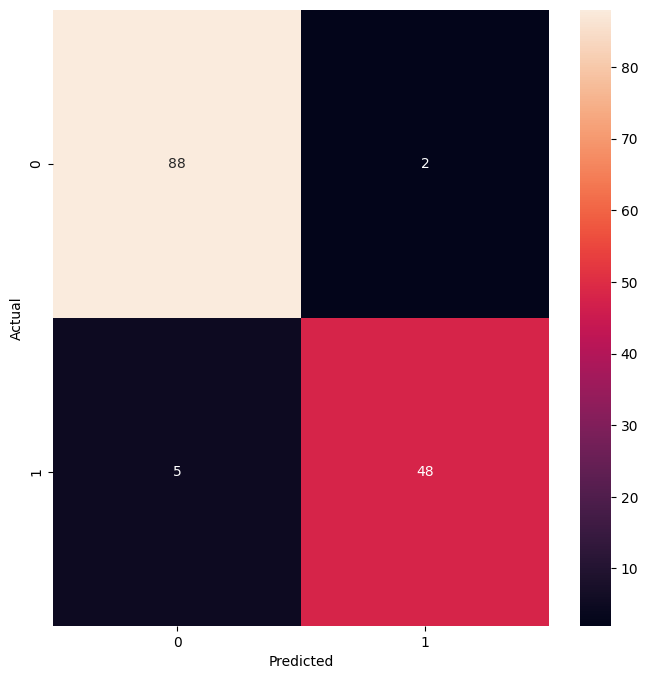

In [222]:
# Calculating the model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

confusion_knn = confusion_matrix(Y_test, knn_prediction)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

knn_cr = classification_report(Y_test, knn_prediction)
print(knn_cr)

## **Support Vector Classifier**

In [223]:
from sklearn.svm import SVC

svc_model = SVC(probability=True)
svc_model.fit(X_train, Y_train)

SVC(probability=True)

In [224]:
# Predicting the model using testing data

svc_prediction = svc_model.predict(X_test)
svc_prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



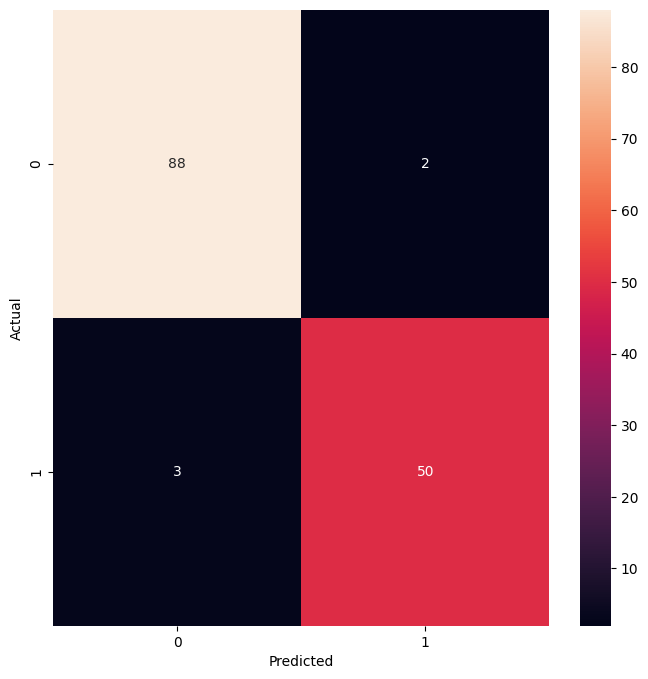

In [225]:
# Calculating the model accuracy

confusion_svc = confusion_matrix(Y_test, svc_prediction)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

svc_cr = classification_report(Y_test, svc_prediction)
print(svc_cr)

## **Logistic Regression**

In [226]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [227]:
# Predicting the result using the testing data
lr_prediction = lr_model.predict(X_test)
lr_prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



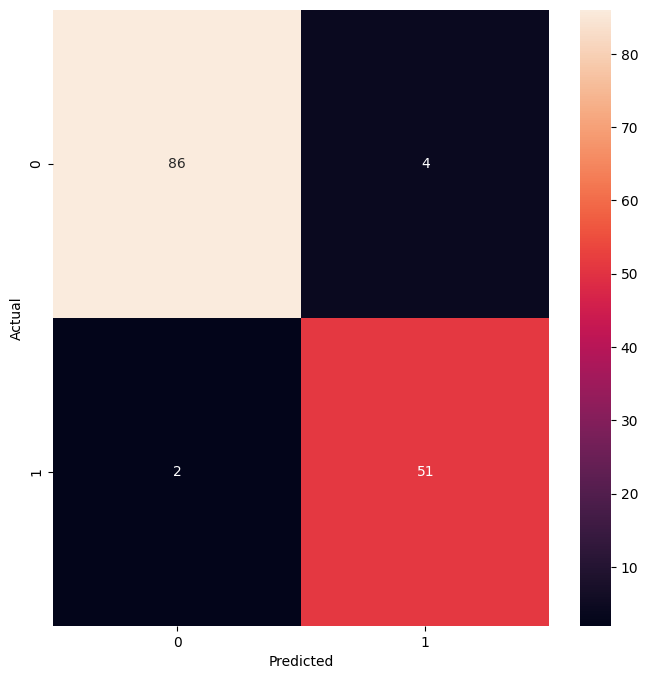

In [228]:
# Calculating the model accuracy

confusion_lr = confusion_matrix(Y_test, lr_prediction)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_lr,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

lr_cr = classification_report(Y_test, lr_prediction)
print(lr_cr)

In [229]:
### ROC-AUC curve


# predict probabilities
pred_prob_knn = knn_model.predict_proba(X_test)
pred_prob_svm = svc_model.predict_proba(X_test)
pred_prob_lr = lr_model.predict_proba(X_test)

In [230]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_knn, tpr_knn, thresh_knn = roc_curve(Y_test, pred_prob_knn[:,1], pos_label=1)
fpr_svm, tpr_svm, thresh_svm = roc_curve(Y_test, pred_prob_svm[:,1], pos_label=1)
fpr_lr, tpr_lr, thresh_lr = roc_curve(Y_test, pred_prob_lr[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)


In [231]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_knn = roc_auc_score(Y_test, pred_prob_knn[:,1])
auc_score_svm = roc_auc_score(Y_test, pred_prob_svm[:,1])
auc_score_lr = roc_auc_score(Y_test, pred_prob_lr[:,1])


print(auc_score_knn, auc_score_svm, auc_score_lr)


0.9935010482180294 0.9974842767295597 0.9928721174004194


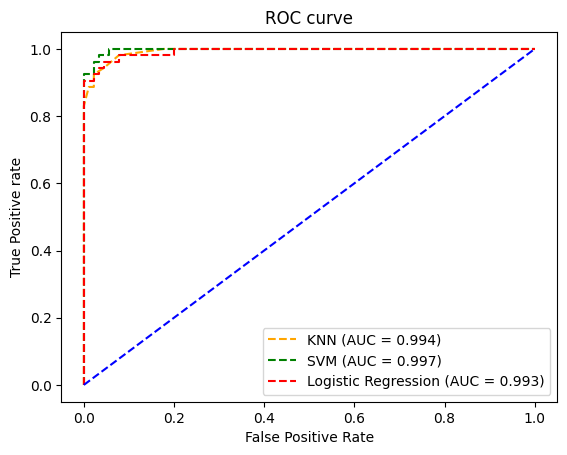

In [232]:
# plotting the roc curve

# matplotlib
# plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN (AUC = %0.3f)' % auc_score_knn)
plt.plot(fpr_svm, tpr_svm, linestyle='--',color='green', label='SVM (AUC = %0.3f)' % auc_score_svm)
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='Logistic Regression (AUC = %0.3f)' % auc_score_lr)

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


## Cross validation

In [233]:
# Implementing K fold cross validation for comparing the classifiers performance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=25)

#KNN model
knn_model_score = cross_val_score(knn_model,X,Y,cv=kf)

#SVM model
svm_model_score = cross_val_score(svc_model,X,Y,cv=kf)

#LR model
lr_model_score = cross_val_score(lr_model,X,Y,cv=kf)

print("The average accuracy of KNN model:", np.mean(knn_model_score))
print("The average accuracy of SVM model:", np.mean(svm_model_score))
print("The average accuracy of LR model:", np.mean(lr_model_score))

The average accuracy of KNN model: 0.93671679197995
The average accuracy of SVM model: 0.9226503759398497
The average accuracy of LR model: 0.9455200501253133


## **Feature Selection**

In [234]:
# correlation matrix

corr = df.corr()
corr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


<Axes: >

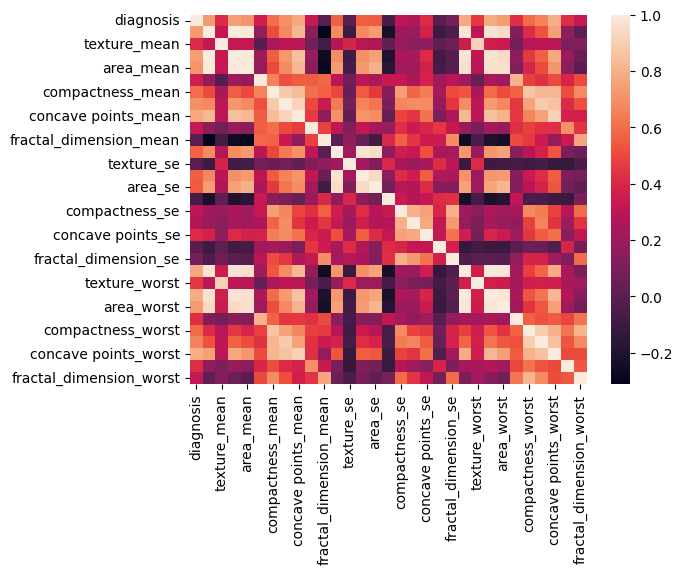

In [235]:
# Generating the heat map
sns.heatmap(corr)

In [236]:
# Compare and remove features having correlation higher than 0.9

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [237]:
# columns after feature selection
selected_columns = df.columns[columns]
selected_columns.shape

(21,)

In [238]:
selected_columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [239]:
# The dataset now only has data with correlation less than 0.9
df = df[selected_columns]
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,...,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,...,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,...,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,...,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [240]:
# assigning 
X_mod = df.drop('diagnosis', axis=1)
Y_mod = df['diagnosis']

In [241]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train_mod, X_test_mod, Y_train_mod, Y_test_mod = train_test_split(X_mod,Y_mod, test_size=0.25, random_state=0)

In [242]:
# Scaling the data
X_train_mod = scaler.fit_transform(X_train_mod)
X_test_mod = scaler.fit_transform(X_test_mod)

## **Now the three models are again trained after reducing the features**

In [243]:
knn_model_mod = KNeighborsClassifier(n_neighbors=11)
knn_model_mod.fit(X_train_mod, Y_train_mod)

KNeighborsClassifier(n_neighbors=11)

In [244]:
svc_model_mod = SVC(probability=True)
svc_model_mod.fit(X_train_mod, Y_train_mod)

SVC(probability=True)

In [245]:

lr_model_mod = LogisticRegression(random_state=0)
lr_model_mod.fit(X_train_mod, Y_train_mod)

LogisticRegression(random_state=0)

In [246]:
### ROC-AUC curve


# predict probabilities
pred_prob_corr_knn = knn_model_mod.predict_proba(X_test_mod)
pred_prob_corr_svm = svc_model_mod.predict_proba(X_test_mod)
pred_prob_corr_lr = lr_model_mod.predict_proba(X_test_mod)

In [247]:
# roc curve for models
fpr_knn_mod, tpr_knn_mod, thresh_knn_mod = roc_curve(Y_test_mod, pred_prob_corr_knn[:,1], pos_label=1)
fpr_svm_mod, tpr_svm_mod, thresh_svm_mod = roc_curve(Y_test_mod, pred_prob_corr_svm[:,1], pos_label=1)
fpr_lr_mod, tpr_lr_mod, thresh_lr_mod = roc_curve(Y_test_mod, pred_prob_corr_lr[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs_mod = [0 for i in range(len(Y_test_mod))]
p_fpr_mod, p_tpr_mod, _ = roc_curve(Y_test_mod, random_probs_mod, pos_label=1)

In [248]:
# auc scores
auc_score_knn_mod = roc_auc_score(Y_test_mod, pred_prob_corr_knn[:,1])
auc_score_svm_mod = roc_auc_score(Y_test_mod, pred_prob_corr_svm[:,1])
auc_score_lr_mod = roc_auc_score(Y_test_mod, pred_prob_corr_lr[:,1])


print(auc_score_knn_mod, auc_score_svm_mod, auc_score_lr_mod)

0.9830188679245283 0.9964360587002096 0.9865828092243186


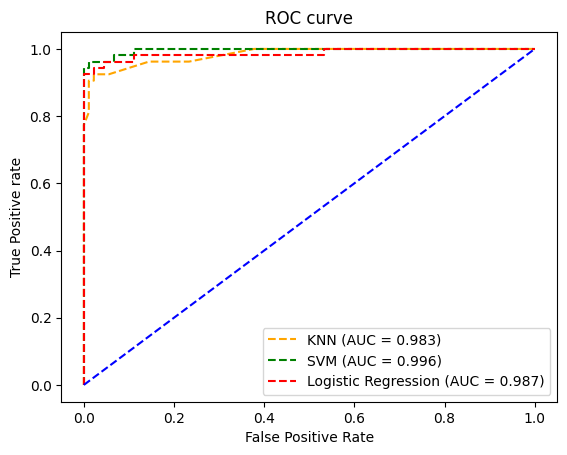

In [249]:
# plot roc curves
plt.plot(fpr_knn_mod, tpr_knn_mod, linestyle='--',color='orange', label='KNN (AUC = %0.3f)' % auc_score_knn_mod)
plt.plot(fpr_svm_mod, tpr_svm_mod, linestyle='--',color='green', label='SVM (AUC = %0.3f)' % auc_score_svm_mod)
plt.plot(fpr_lr_mod, tpr_lr_mod, linestyle='--',color='red', label='Logistic Regression (AUC = %0.3f)' % auc_score_lr_mod)

plt.plot(p_fpr_mod, p_tpr_mod, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## **Principal Component Analysis**

In [250]:
# Data Standardization
# from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X_mod)

In [251]:
## Calculating covariance matrix

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00176056e+00  3.24351929e-01  1.70881506e-01  5.07014640e-01
   6.77955036e-01  1.48001350e-01 -3.12179472e-01  6.80285970e-01
  -9.74887767e-02 -2.22992026e-01  2.06362656e-01  1.94545531e-01
   3.76831225e-01 -1.04504545e-01 -4.27163418e-02  1.19826732e-01
   4.14190751e-01  5.27839123e-01  1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00 -2.34296930e-02  2.37118951e-01
   3.02950254e-01  7.15266864e-02 -7.65717560e-02  2.76354360e-01
   3.87037830e-01  6.62542133e-03  1.92312595e-01  1.43545353e-01
   1.64139495e-01  9.14323671e-03  5.45533955e-02  7.76398084e-02
   2.78318729e-01  3.01555198e-01  1.05192783e-01  1.19415220e-01]
 [ 1.70881506e-01 -2.34296930e-02  1.00176056e+00  6.60283643e-01
   5.22902753e-01  5.58756786e-01  5.85821565e-01  3.01997850e-01
   6.85268821e-02  3.32960611e-01  3.19504817e-01  2.48832996e-01
   3.81345895e-01  2.01127852e-01  2.84106006e-01  8.06742020e-01
   4.73300254e-01  4.35691429e-01  3.95003689e-01  5.00

In [252]:
## Eigen decomposition of the covariance matrix

eig_vals,eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[-1.32037515e-01  4.42178530e-01  2.78536926e-01 -1.32657937e-01
   9.66915844e-02 -1.23111415e-01  7.77259874e-02  1.38455951e-01
   3.11669594e-02 -9.40857460e-02  9.53497683e-02  5.22070771e-01
  -2.48342386e-01 -5.59168111e-02  3.63604566e-02 -1.47547706e-01
   8.71473992e-02  1.05224070e-01 -4.94078183e-01  4.39244853e-04]
 [-8.65416182e-02  1.42663299e-01  2.44568317e-01 -1.23848980e-01
  -1.42693268e-01  7.22979960e-01 -1.67936534e-01  7.76706738e-02
  -3.61331690e-01 -9.58683541e-02 -4.01928394e-01 -4.29917682e-03
   4.90374213e-02  2.86992100e-02  8.19118172e-03  1.45679807e-03
   1.51732672e-02  1.44468195e-02  4.78012156e-04 -1.21060937e-01]
 [-2.26589267e-01 -3.63868459e-02 -2.23909288e-01 -3.21011259e-01
   3.66540488e-01 -6.50003498e-02  1.40692286e-01 -2.55317740e-01
   1.24969859e-01 -1.57466773e-01 -3.36503279e-01  1.68510576e-01
   3.51862515e-01  2.56695777e-01  1.23897469e-02 -1.29918996e-03
   4.55072805e-02  4.33327157e-01  7.30999093e-02 -5.9208616

## **Selecting Principal Components**

In [253]:

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# confirm that the list is correctly sorted by descending eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
8.5375299648776
2.6950283486964666
2.3870843336164382
1.5214207170106142
1.195041721438632
1.1112402547841274
0.49538068068947905
0.4343386466873266
0.3553483553071337
0.27738684104993777
0.2644016399576815
0.2066005192786425
0.18055571014542435
0.12874998639578672
0.07818772192161312
0.05547124143297811
0.04386315623628207
0.03000242490444906
0.023245547505960203
0.014333455669060705


In [254]:
# Explained variance

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]


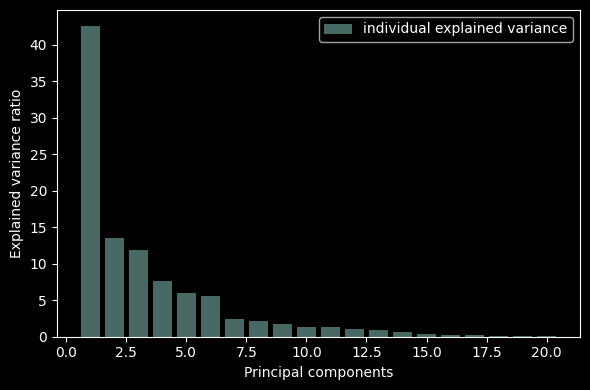

In [255]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(1,21), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

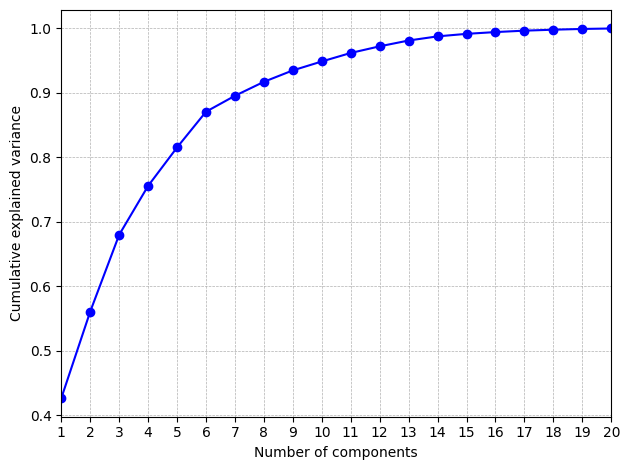

In [256]:
from sklearn.decomposition import PCA  

# Fit the PCA model
pca = PCA().fit(X_std)

# Plot cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),  # Start x-axis from 1
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='-', color='b')

# Adjust x-axis limits to match the number of components
plt.xlim(1, len(pca.explained_variance_ratio_))

# Set x-axis labels
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure labels match the components

# Labeling the axes
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Adding a grid with dashed lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()



In [257]:
# Standardize the data
# X = scaler.fit_transform(X)

pca_modified=PCA(n_components=8)
X_pca = pca_modified.fit_transform(X_std)

In [258]:

print(sum(pca_modified.explained_variance_ratio_))
X_pca.shape
# print(X)


0.9172383770923365


(569, 8)

In [259]:
#Splitting into train and test data
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca,Y,test_size=0.25,random_state=4)

In [260]:
#KNN
knn_model_pca = KNeighborsClassifier(n_neighbors=11)
knn_model_pca.fit(X_train_pca, Y_train_pca)
knn_model_pca.score(X_test_pca,Y_test_pca)

0.972027972027972

In [261]:
#SVM
svc_model_pca = SVC(probability=True)
svc_model_pca.fit(X_train_pca, Y_train_pca)
svc_model_pca.score(X_test_pca,Y_test_pca)

0.986013986013986

In [262]:
# Logistic Regression
lr_model_pca = LogisticRegression()
lr_model_pca.fit(X_train_pca, Y_train_pca)
lr_model_pca.score(X_test_pca,Y_test_pca)

0.965034965034965

In [263]:
# predict probabilities

pred_prob_knn_pca = knn_model_pca.predict_proba(X_test_pca)
pred_prob_svc_pca = svc_model_pca.predict_proba(X_test_pca)
pred_prob_lr_pca = lr_model_pca.predict_proba(X_test_pca)


In [264]:
# roc curve for models

fpr_knn_pca, tpr_knn_pca, thresh_knn_pca = roc_curve(Y_test_pca, pred_prob_knn_pca[:,1], pos_label=1)
fpr_svc_pca, tpr_svc_pca, thresh_svc_pca = roc_curve(Y_test_pca, pred_prob_svc_pca[:,1], pos_label=1)
fpr_lr_pca, tpr_lr_pca, thresh_lr_pca = roc_curve(Y_test_pca, pred_prob_lr_pca[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs_pca = [0 for i in range(len(Y_test_pca))]
p_fpr_pca, p_tpr_pca, _ = roc_curve(Y_test_pca, random_probs_pca, pos_label=1)


In [265]:
# auc scores

auc_score_knn_pca = roc_auc_score(Y_test_pca, pred_prob_knn_pca[:,1])
auc_score_svc_pca = roc_auc_score(Y_test_pca, pred_prob_svc_pca[:,1])
auc_score_lr_pca = roc_auc_score(Y_test_pca, pred_prob_lr_pca[:,1])



print(auc_score_knn_pca,auc_score_svc_pca,auc_score_lr_pca)

0.994188596491228 0.9980263157894738 0.9949561403508772


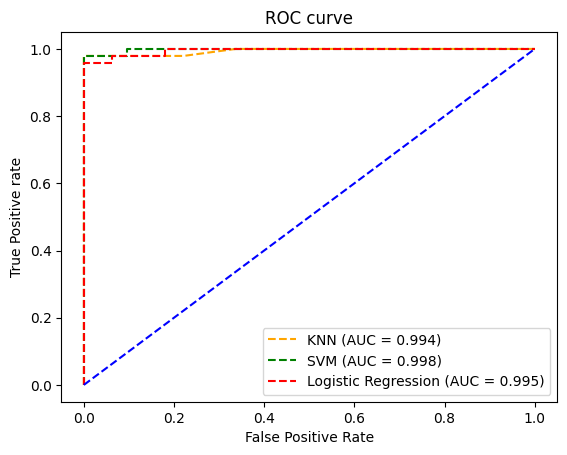

In [266]:
# plotting the roc curve

# matplotlib
# plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_knn_pca, tpr_knn_pca, linestyle='--',color='orange', label='KNN (AUC = %0.3f)' % auc_score_knn_pca)
plt.plot(fpr_svc_pca, tpr_svc_pca, linestyle='--',color='green', label='SVM (AUC = %0.3f)' % auc_score_svc_pca)
plt.plot(fpr_lr_pca, tpr_lr_pca, linestyle='--',color='red', label='Logistic Regression (AUC = %0.3f)' % auc_score_lr_pca)

plt.plot(p_fpr_pca, p_tpr_pca, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [272]:
# Visualizing the first to principal  components
pca_modified=PCA(n_components=2)
X_pca = pca_modified.fit_transform(X_std)

principal_breast_Df = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])


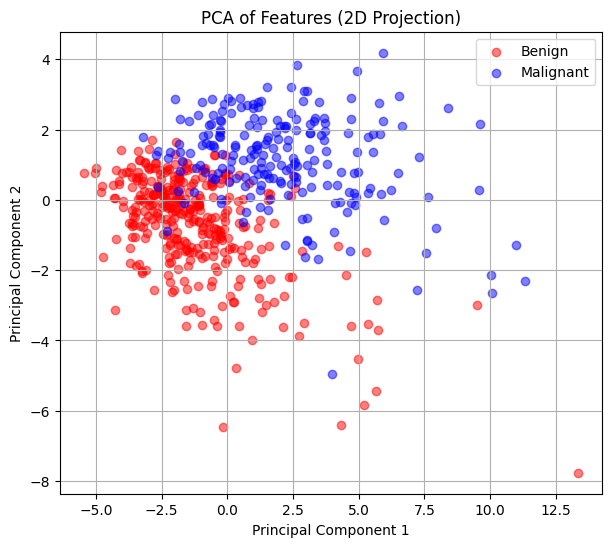

In [273]:
# Create a DataFrame to store the PCA components along with the target variable
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, Y_mod.reset_index(drop=True)], axis=1)

# Plotting the data
plt.figure(figsize=(7, 6))

# Scatter plot for the 0 class
plt.scatter(pca_df.loc[pca_df['diagnosis'] == 0, 'Principal Component 1'],
            pca_df.loc[pca_df['diagnosis'] == 0, 'Principal Component 2'],
            color='r', alpha=0.5, label='Benign')

# Scatter plot for the 1 class
plt.scatter(pca_df.loc[pca_df['diagnosis'] == 1, 'Principal Component 1'],
            pca_df.loc[pca_df['diagnosis'] == 1, 'Principal Component 2'],
            color='b', alpha=0.5, label='Malignant')

# Adding titles and labels
plt.title('PCA of Features (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)

# Display the plot
plt.show()